In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_rows",100)

In [2]:
train_df=pd.read_csv(r"H:\AI\librariesforAI\EDA\HousePrices\train.csv")
test_df=pd.read_csv(r"H:\AI\librariesforAI\EDA\HousePrices\test.csv")

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.drop(["Id"],axis=1,inplace=True)

In [5]:
for features in train_df.columns:
    if train_df[features].isnull().sum()>0:
        print("The column name",features,"has",train_df[features].isnull().sum(),"missing values")

The column name LotFrontage has 259 missing values
The column name Alley has 1369 missing values
The column name MasVnrType has 8 missing values
The column name MasVnrArea has 8 missing values
The column name BsmtQual has 37 missing values
The column name BsmtCond has 37 missing values
The column name BsmtExposure has 38 missing values
The column name BsmtFinType1 has 37 missing values
The column name BsmtFinType2 has 38 missing values
The column name Electrical has 1 missing values
The column name FireplaceQu has 690 missing values
The column name GarageType has 81 missing values
The column name GarageYrBlt has 81 missing values
The column name GarageFinish has 81 missing values
The column name GarageQual has 81 missing values
The column name GarageCond has 81 missing values
The column name PoolQC has 1453 missing values
The column name Fence has 1179 missing values
The column name MiscFeature has 1406 missing values


In [6]:
nullCols = [feature for feature in train_df.columns if train_df[feature].isnull().sum()>0]
nullCols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [7]:
train_df.nullPercent=train_df.apply(lambda x:np.round(100*x.isnull().sum()/train_df.shape[0],2))
train_dfNullCOunt=train_df.isna().sum()

C:\Users\HP\AppData\Local\Temp/ipykernel_13624/3991095152.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train_df.nullPercent=train_df.apply(lambda x:np.round(100*x.isnull().sum()/train_df.shape[0],2))


In [8]:
train_df.nullPercent

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

In [15]:
train_dfNullCOunt

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [9]:
newtrain_dfnull=pd.DataFrame([train_dfNullCOunt,train_df.nullPercent]).T

In [10]:
newtrain_dfnull.columns=["NullValues","NullPercenatge"]
newtrain_dfnull.sort_values(by="NullValues",ascending=False,inplace=True)
updated_new=newtrain_dfnull.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"])

,NullValues,NullPercenatge
PoolQC,1453.0,99.52
MiscFeature,1406.0,96.30
Alley,1369.0,93.77
Fence,1179.0,80.75
FireplaceQu,690.0,47.26
LotFrontage,259.0,17.74
GarageYrBlt,81.0,5.55
GarageCond,81.0,5.55
GarageType,81.0,5.55
GarageFinish,81.0,5.55


In [11]:
updated_new=newtrain_dfnull.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"])

In [12]:
updated_new.reset_index(inplace=True)

In [13]:
updated_new[:14]["index"]

0      LotFrontage
1      GarageYrBlt
2       GarageCond
3       GarageType
4     GarageFinish
5       GarageQual
6     BsmtExposure
7     BsmtFinType2
8         BsmtCond
9         BsmtQual
10    BsmtFinType1
11      MasVnrArea
12      MasVnrType
13      Electrical
Name: index, dtype: object

In [14]:
train_df.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1,inplace=True)

In [15]:
newtrain_dfnull.columns=["NullValues","NullPercenatge"]
newtrain_dfnull.sort_values(by="NullValues",ascending=False,inplace=True)
newtrain_dfnull

,NullValues,NullPercenatge
PoolQC,1453.0,99.52
MiscFeature,1406.0,96.30
Alley,1369.0,93.77
Fence,1179.0,80.75
FireplaceQu,690.0,47.26
LotFrontage,259.0,17.74
GarageYrBlt,81.0,5.55
GarageCond,81.0,5.55
GarageFinish,81.0,5.55
GarageQual,81.0,5.55


In [16]:
train_df.nullPercent=train_df.apply(lambda x:np.round(100*x.isnull().sum()/train_df.shape[0],2))
train_dfNullCOunt=train_df.isna().sum()
newtrain_dfnull=pd.DataFrame([train_dfNullCOunt,train_df.nullPercent]).T
newtrain_dfnull.columns=["NullValues","NullPercenatge"]
newtrain_dfnull.sort_values(by="NullValues",ascending=False,inplace=True)
newtrain_dfnull.reset_index(inplace=True)
newtrain_dfnull.head(10)

,index,NullValues,NullPercenatge
0,LotFrontage,259.0,17.74
1,GarageType,81.0,5.55
2,GarageYrBlt,81.0,5.55
3,GarageFinish,81.0,5.55
4,GarageQual,81.0,5.55
5,GarageCond,81.0,5.55
6,BsmtFinType2,38.0,2.60
7,BsmtExposure,38.0,2.60
8,BsmtQual,37.0,2.53
9,BsmtCond,37.0,2.53


In [17]:
newtrain_dfnull.head(20)

,index,NullValues,NullPercenatge
0,LotFrontage,259.0,17.74
1,GarageType,81.0,5.55
2,GarageYrBlt,81.0,5.55
3,GarageFinish,81.0,5.55
4,GarageQual,81.0,5.55
5,GarageCond,81.0,5.55
6,BsmtFinType2,38.0,2.60
7,BsmtExposure,38.0,2.60
8,BsmtQual,37.0,2.53
9,BsmtCond,37.0,2.53


In [18]:
nullColumns = np.array(newtrain_dfnull[:14]["index"])
nullColumns

array(['LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType',
       'Electrical'], dtype=object)

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [20]:
for column in nullColumns:
    if train_df[column].dtype=="object":
        print(column)
        train_df[column].fillna(train_df[column].mode()[0],inplace=True)
    else:
        print(f"{column} this is numerical")
        train_df[column].fillna(train_df[column].median(),inplace=True)

LotFrontage this is numerical
GarageType
GarageYrBlt this is numerical
GarageFinish
GarageQual
GarageCond
BsmtFinType2
BsmtExposure
BsmtQual
BsmtCond
BsmtFinType1
MasVnrArea this is numerical
MasVnrType
Electrical


In [21]:
train_df.nullPercent=train_df.apply(lambda x:np.round(100*x.isnull().sum()/train_df.shape[0],2))
train_dfNullCOunt=train_df.isna().sum()
newtrain_dfnull=pd.DataFrame([train_dfNullCOunt,train_df.nullPercent]).T
newtrain_dfnull.columns=["NullValues","NullPercenatge"]
newtrain_dfnull.sort_values(by="NullValues",ascending=False,inplace=True)
newtrain_dfnull.reset_index(inplace=True)
newtrain_dfnull.head(10)

,index,NullValues,NullPercenatge
0,MSSubClass,0.0,0.0
1,GarageYrBlt,0.0,0.0
2,Fireplaces,0.0,0.0
3,Functional,0.0,0.0
4,TotRmsAbvGrd,0.0,0.0
5,KitchenQual,0.0,0.0
6,KitchenAbvGr,0.0,0.0
7,BedroomAbvGr,0.0,0.0
8,HalfBath,0.0,0.0
9,FullBath,0.0,0.0


In [22]:
numericalColumns = train_df.select_dtypes(include=np.number).columns
numericalColumns 

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [23]:
objectColumns = train_df.select_dtypes(include=np.object).columns
objectColumns

C:\Users\HP\AppData\Local\Temp/ipykernel_13624/3609805090.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  objectColumns = train_df.select_dtypes(include=np.object).columns


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

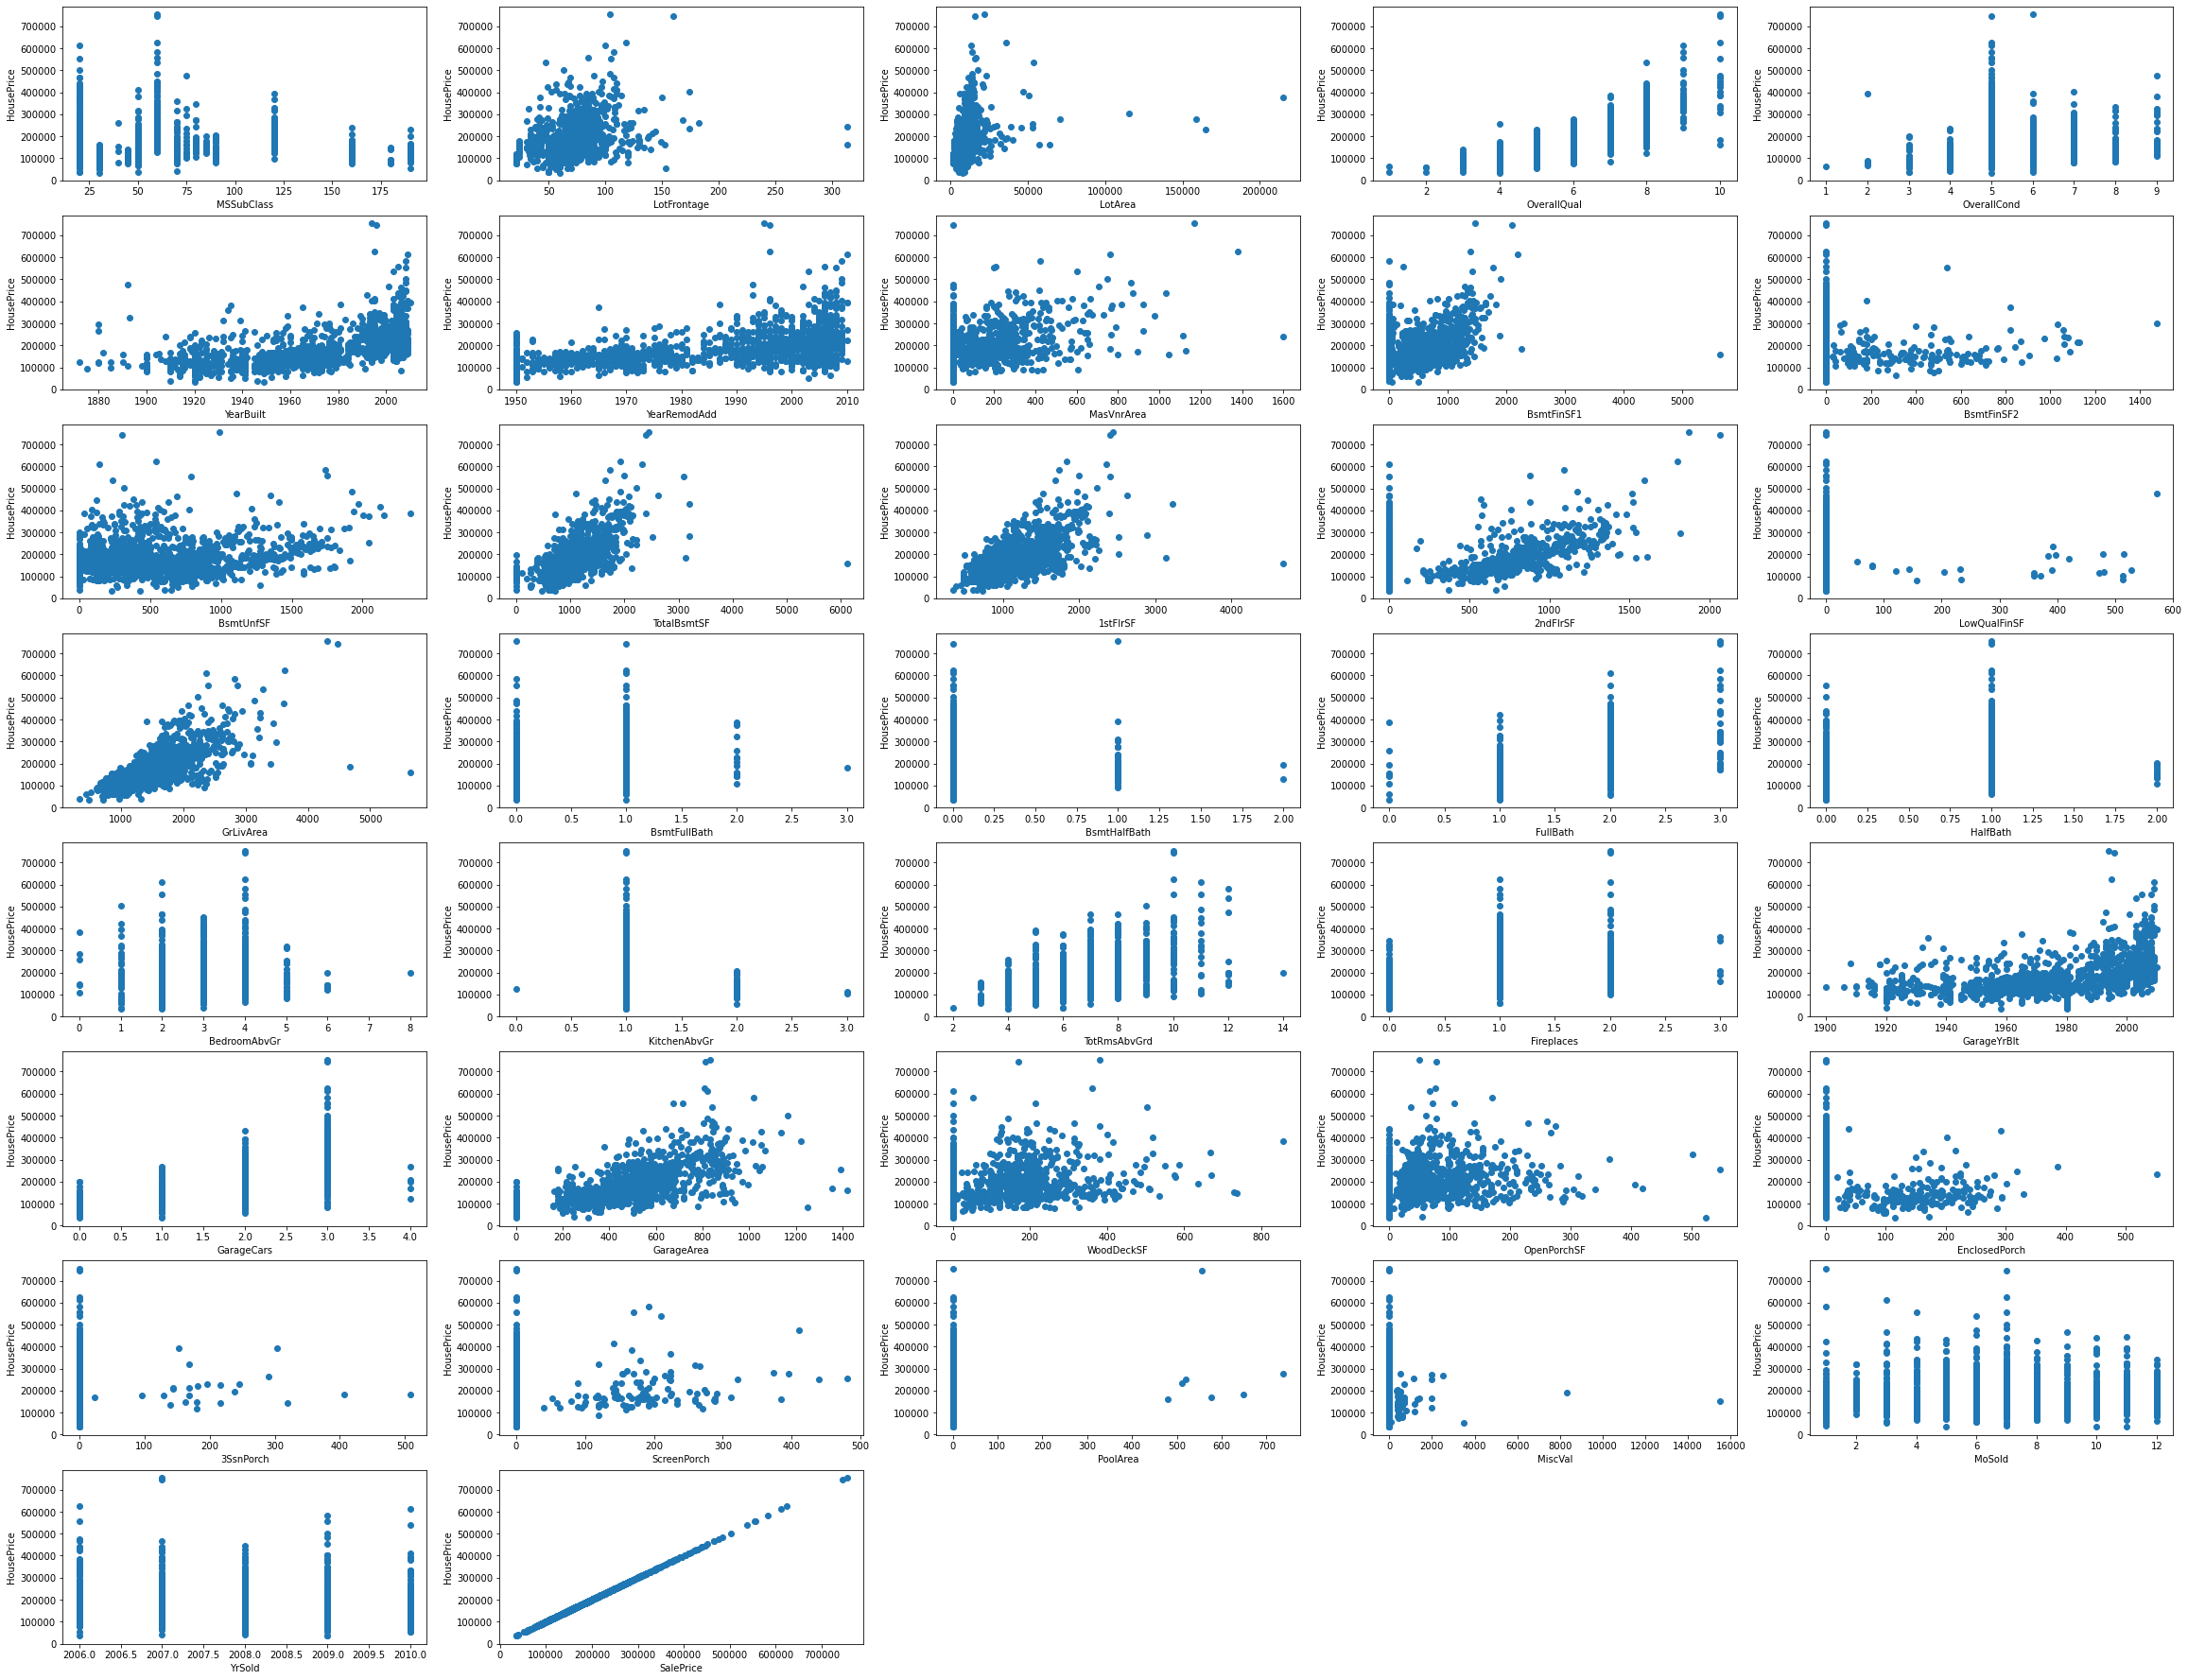

In [24]:
j=0
plt.figure(figsize=(40,40))
for column in numericalColumns:
    plt.subplot(10,5,j+1)
    plt.scatter(train_df[column],train_df['SalePrice'])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

In [25]:
train_df["MSSubClass"].nunique()

15

In [26]:
train_df["LotFrontage"].nunique()

110

In [27]:
descriateCols=[]
continuesCols=[]

for column in numericalColumns:
    if train_df[column].nunique()>20:
        continuesCols.append(column)
    else:
        descriateCols.append(column)

In [28]:
continuesCols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [29]:
descriateCols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

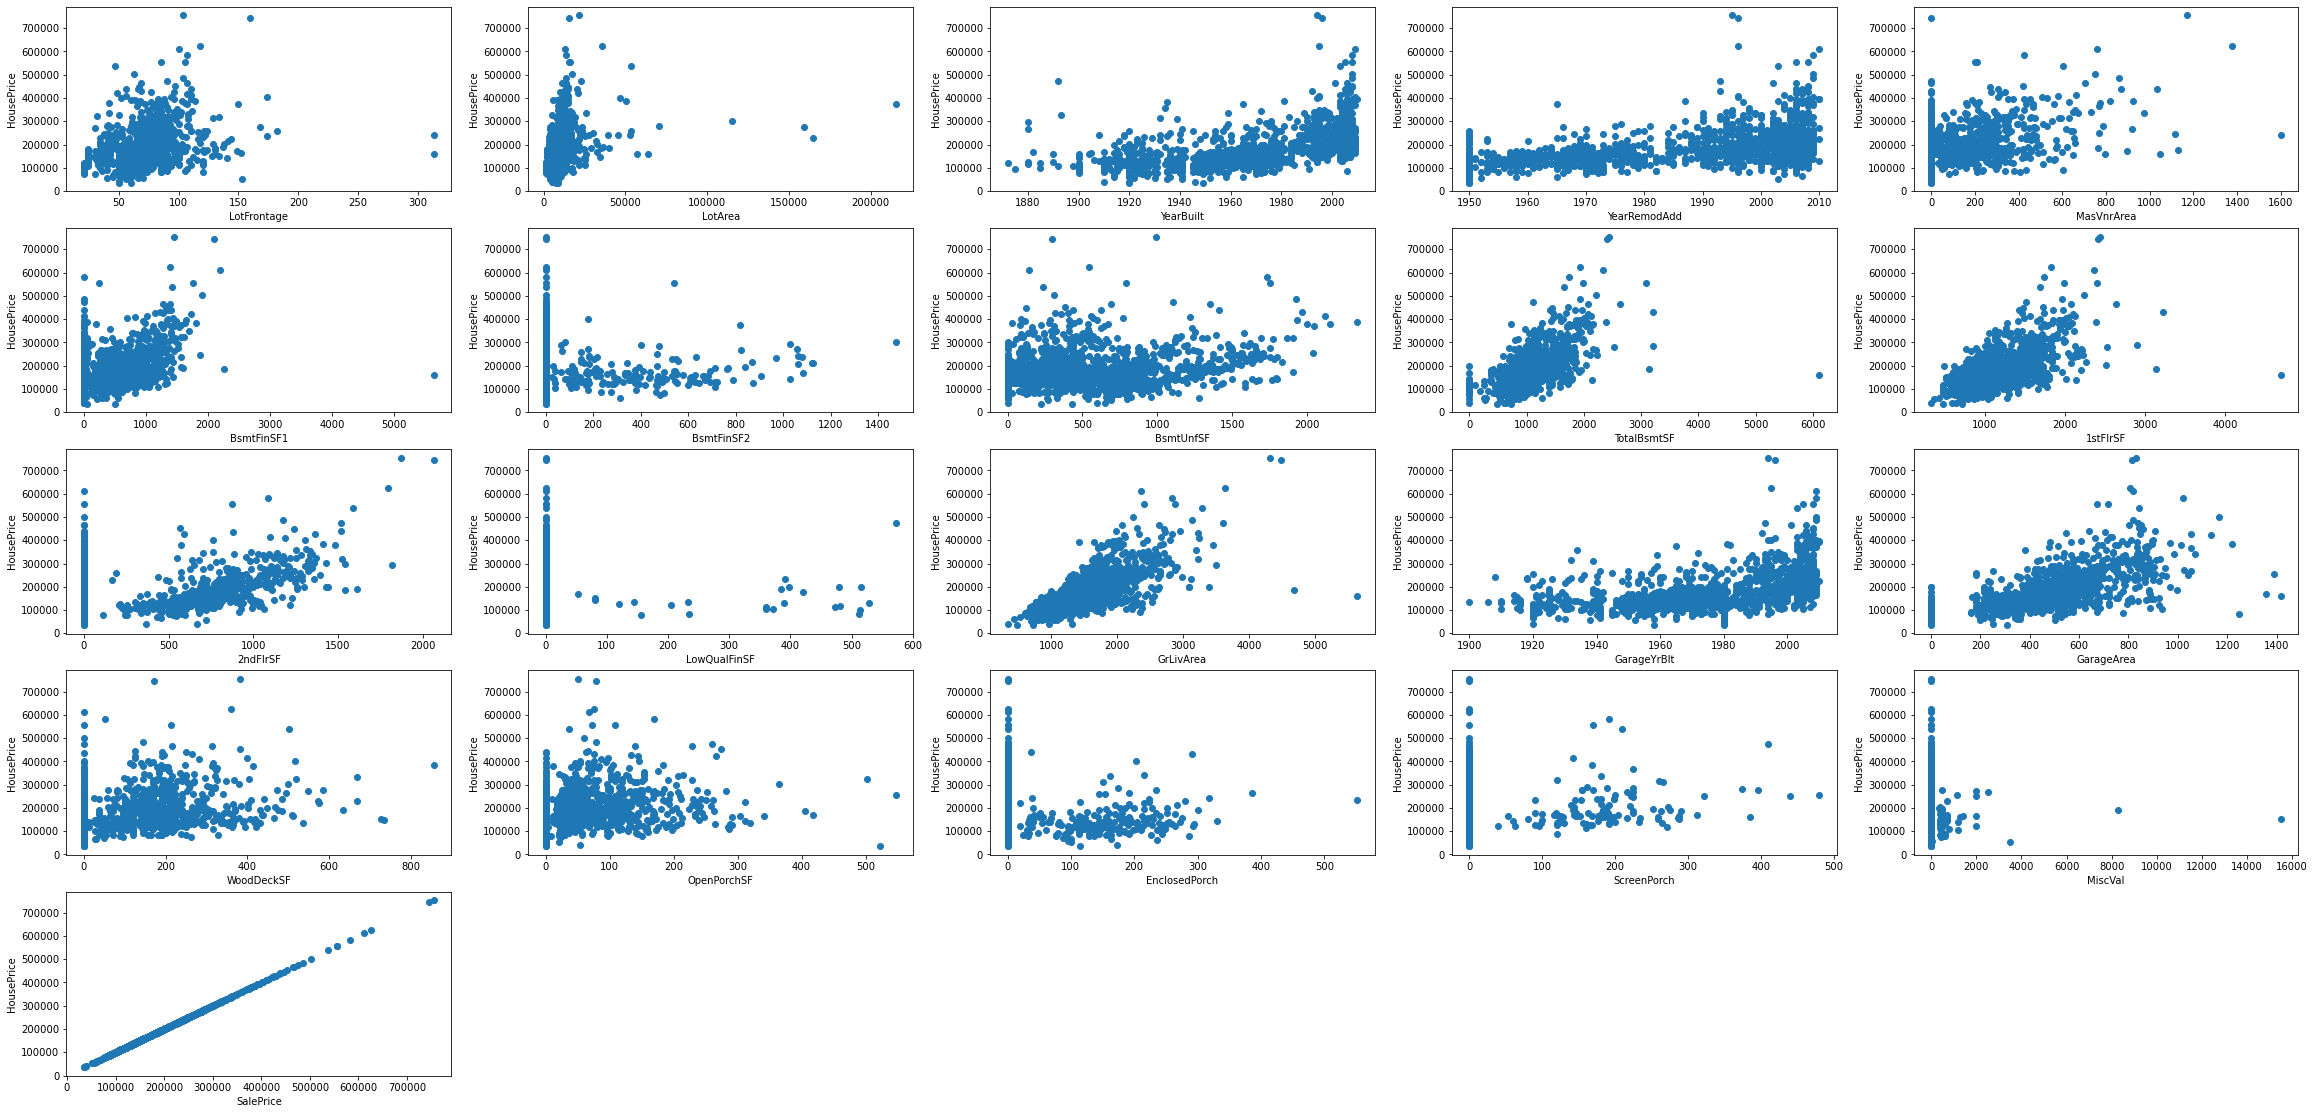

In [31]:
j=0
plt.figure(figsize=(40,40))
for column in continuesCols:
    plt.subplot(10,5,j+1)
    plt.scatter(train_df[column],train_df['SalePrice'])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

In [37]:
observationval=train_df.groupby("MSSubClass")["SalePrice"].mean()
observationval
observationval_Df=pd.DataFrame(observationval).sort_values(by="SalePrice",ascending=False)

In [39]:
observationval_Df.reset_index(inplace=True)

In [40]:
observationval_Df

,MSSubClass,SalePrice
0,60,239948.501672
1,120,200779.080460
2,75,192437.500000
3,20,185224.811567
4,80,169736.551724
5,70,166772.416667
6,40,156125.000000
7,85,147810.000000
8,50,143302.972222
9,160,138647.380952


Text(0, 0.5, 'HousePrice')

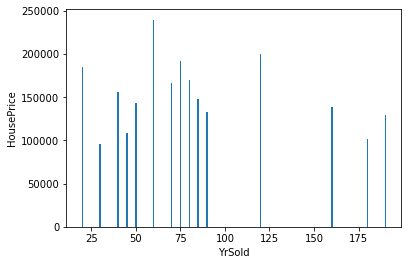

In [41]:
plt.bar(observationval_Df["MSSubClass"],observationval_Df["SalePrice"])
plt.xlabel(column)
plt.ylabel("HousePrice")

Text(0, 0.5, 'HousePrice')

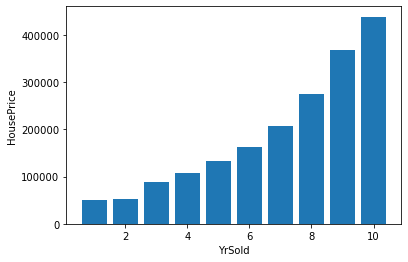

In [42]:
observationval=train_df.groupby("OverallQual")["SalePrice"].mean()
observationval_Df=pd.DataFrame(observationval).sort_values(by="SalePrice",ascending=False)
observationval_Df.reset_index(inplace=True)
plt.bar(observationval_Df["OverallQual"],observationval_Df["SalePrice"])
plt.xlabel(column)
plt.ylabel("HousePrice")

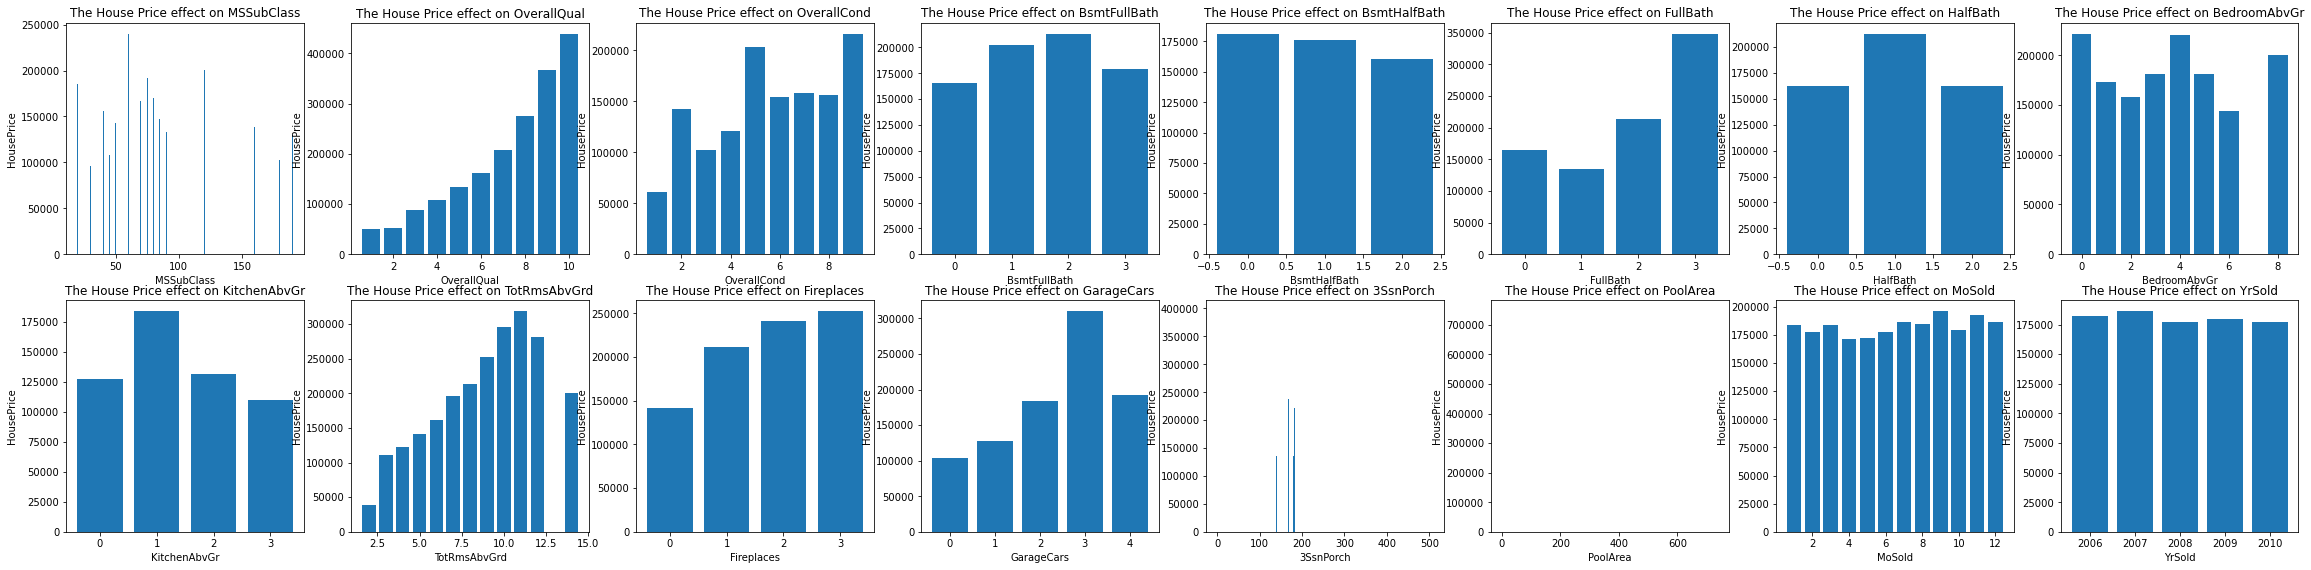

In [50]:
j=0
plt.figure(figsize=(40,40))
for column in descriateCols:
    plt.subplot(8,8,j+1)
    observationval=train_df.groupby(column)["SalePrice"].mean()
    observationval_Df=pd.DataFrame(observationval).sort_values(by="SalePrice",ascending=False)
    observationval_Df.reset_index(inplace=True)
    plt.title(f"The House Price effect on {column}")
    plt.bar(observationval_Df[column],observationval_Df["SalePrice"])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1



In [51]:
objectColumns = train_df.select_dtypes(include=np.object).columns
objectColumns

C:\Users\HP\AppData\Local\Temp/ipykernel_13624/3609805090.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  objectColumns = train_df.select_dtypes(include=np.object).columns


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

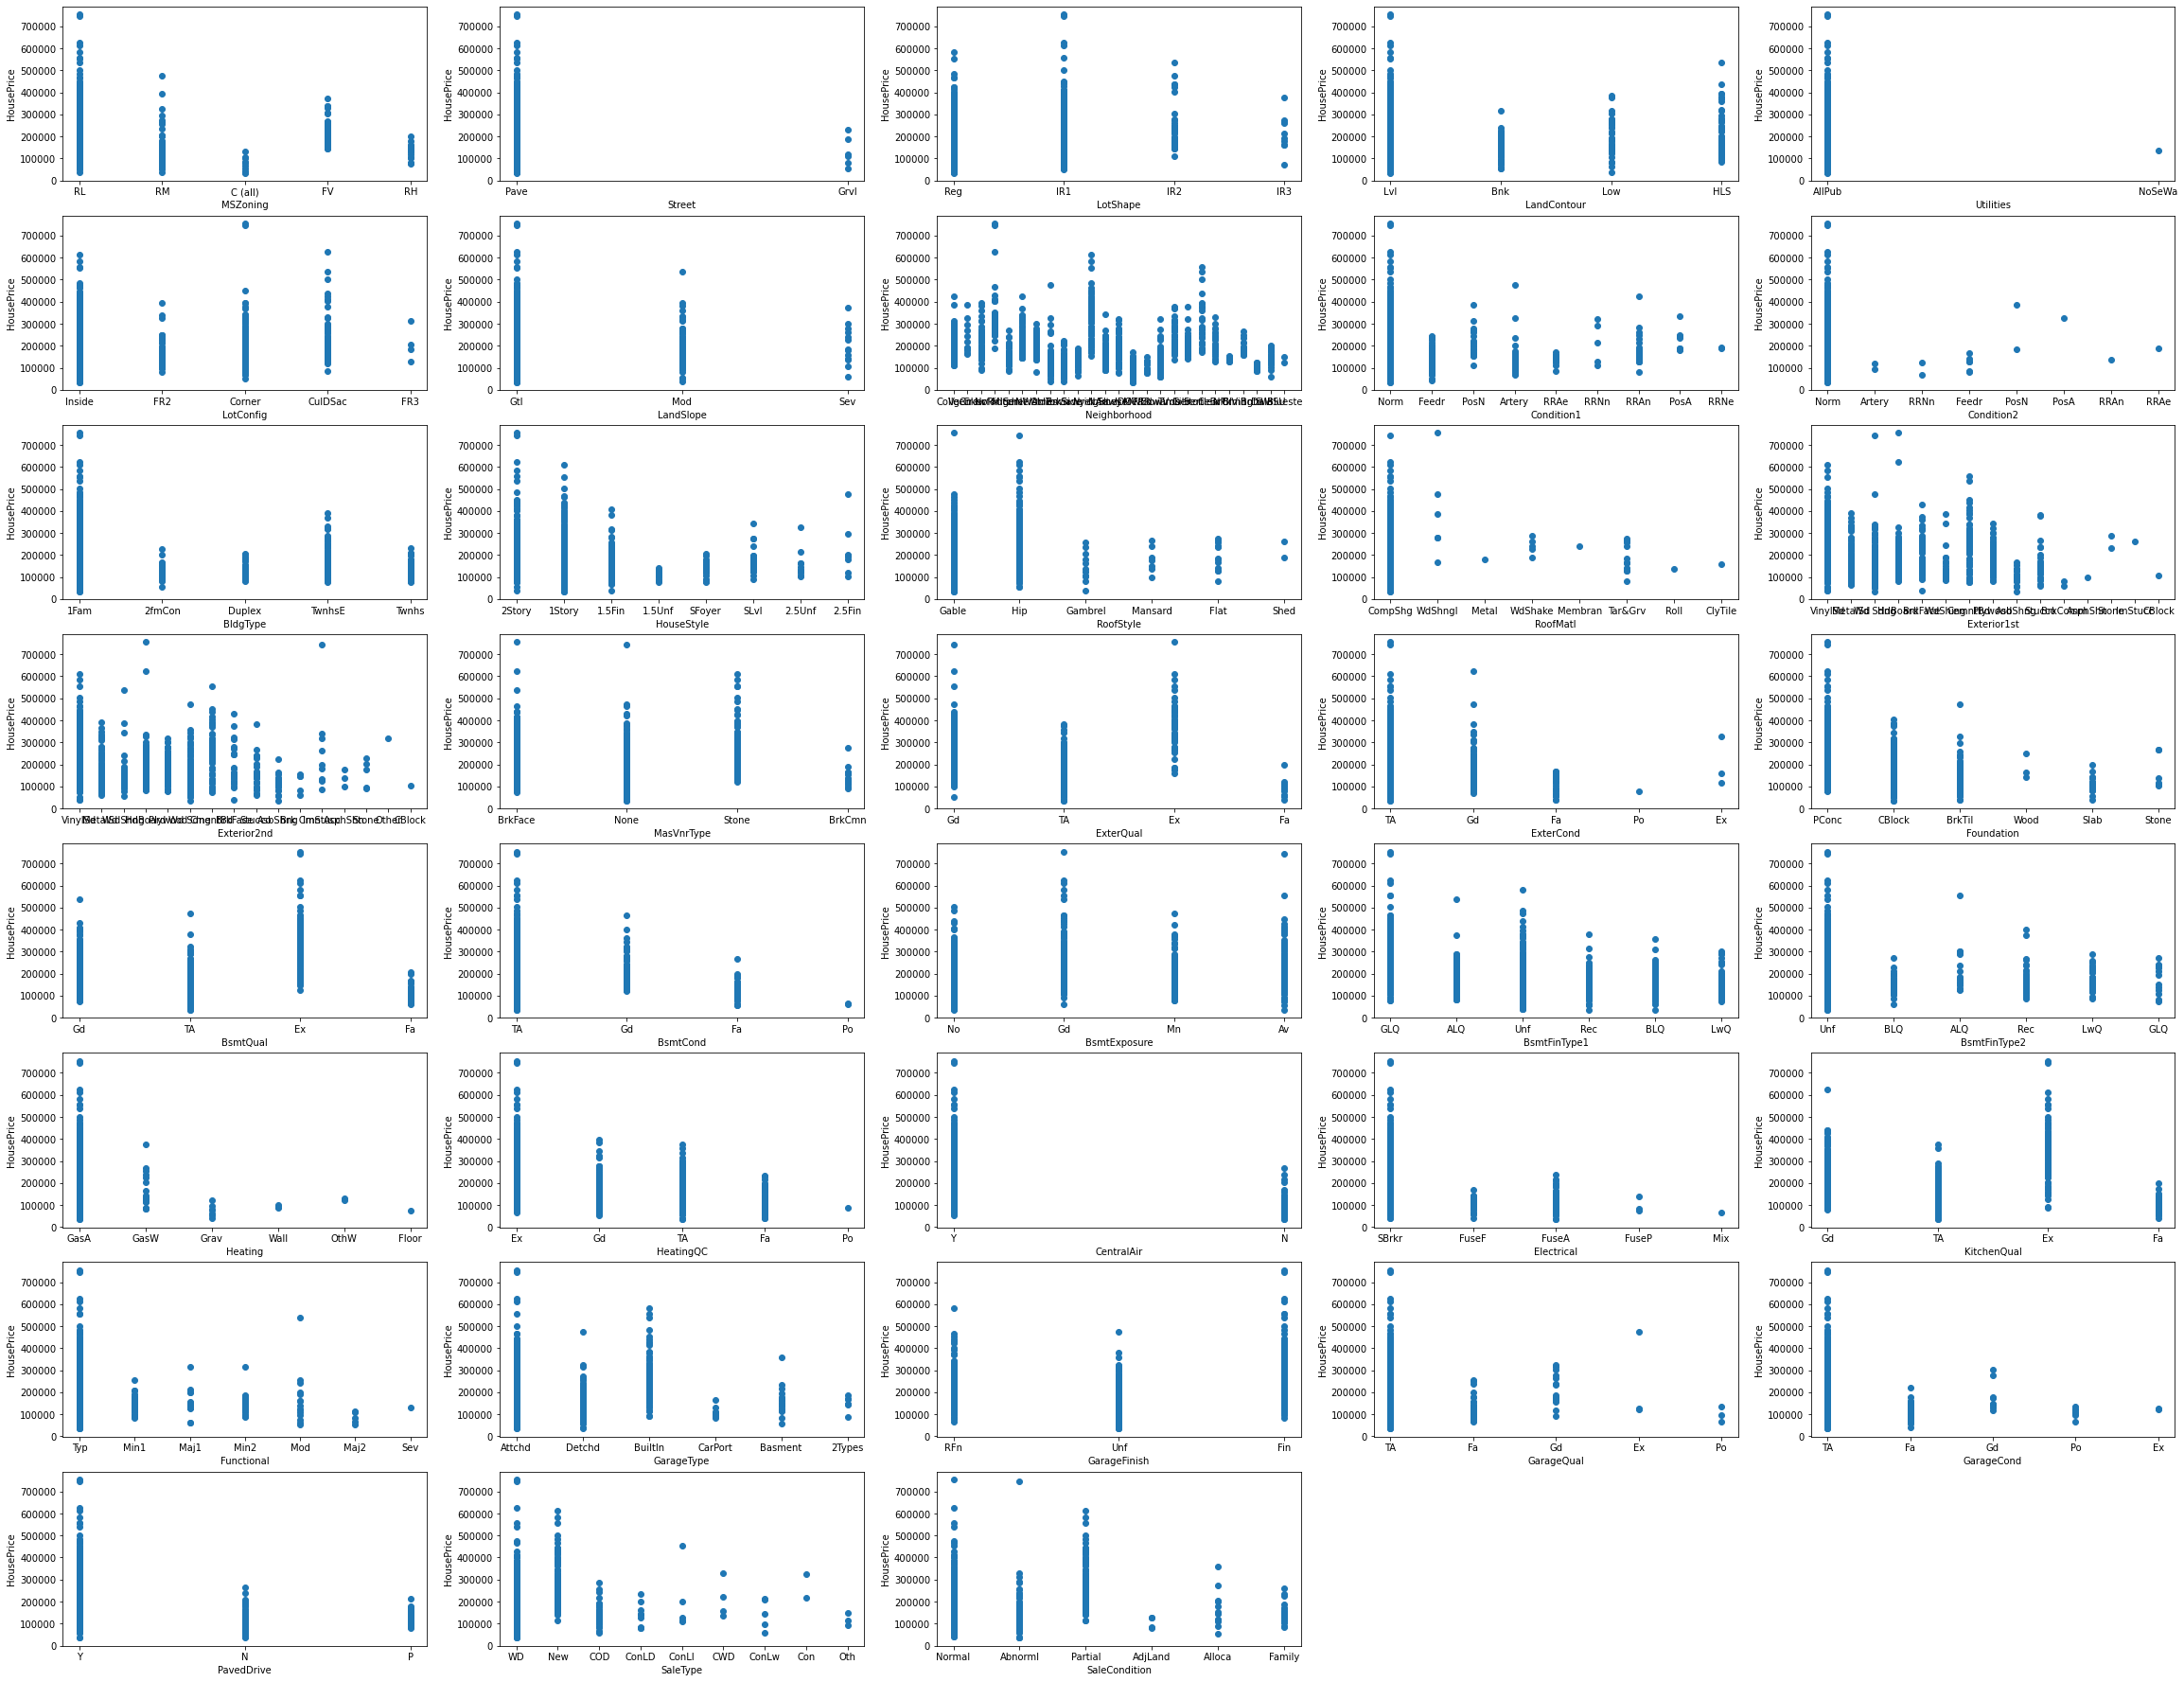

In [52]:
j=0
plt.figure(figsize=(40,40))
for column in objectColumns:
    plt.subplot(10,5,j+1)
    plt.scatter(train_df[column],train_df['SalePrice'])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

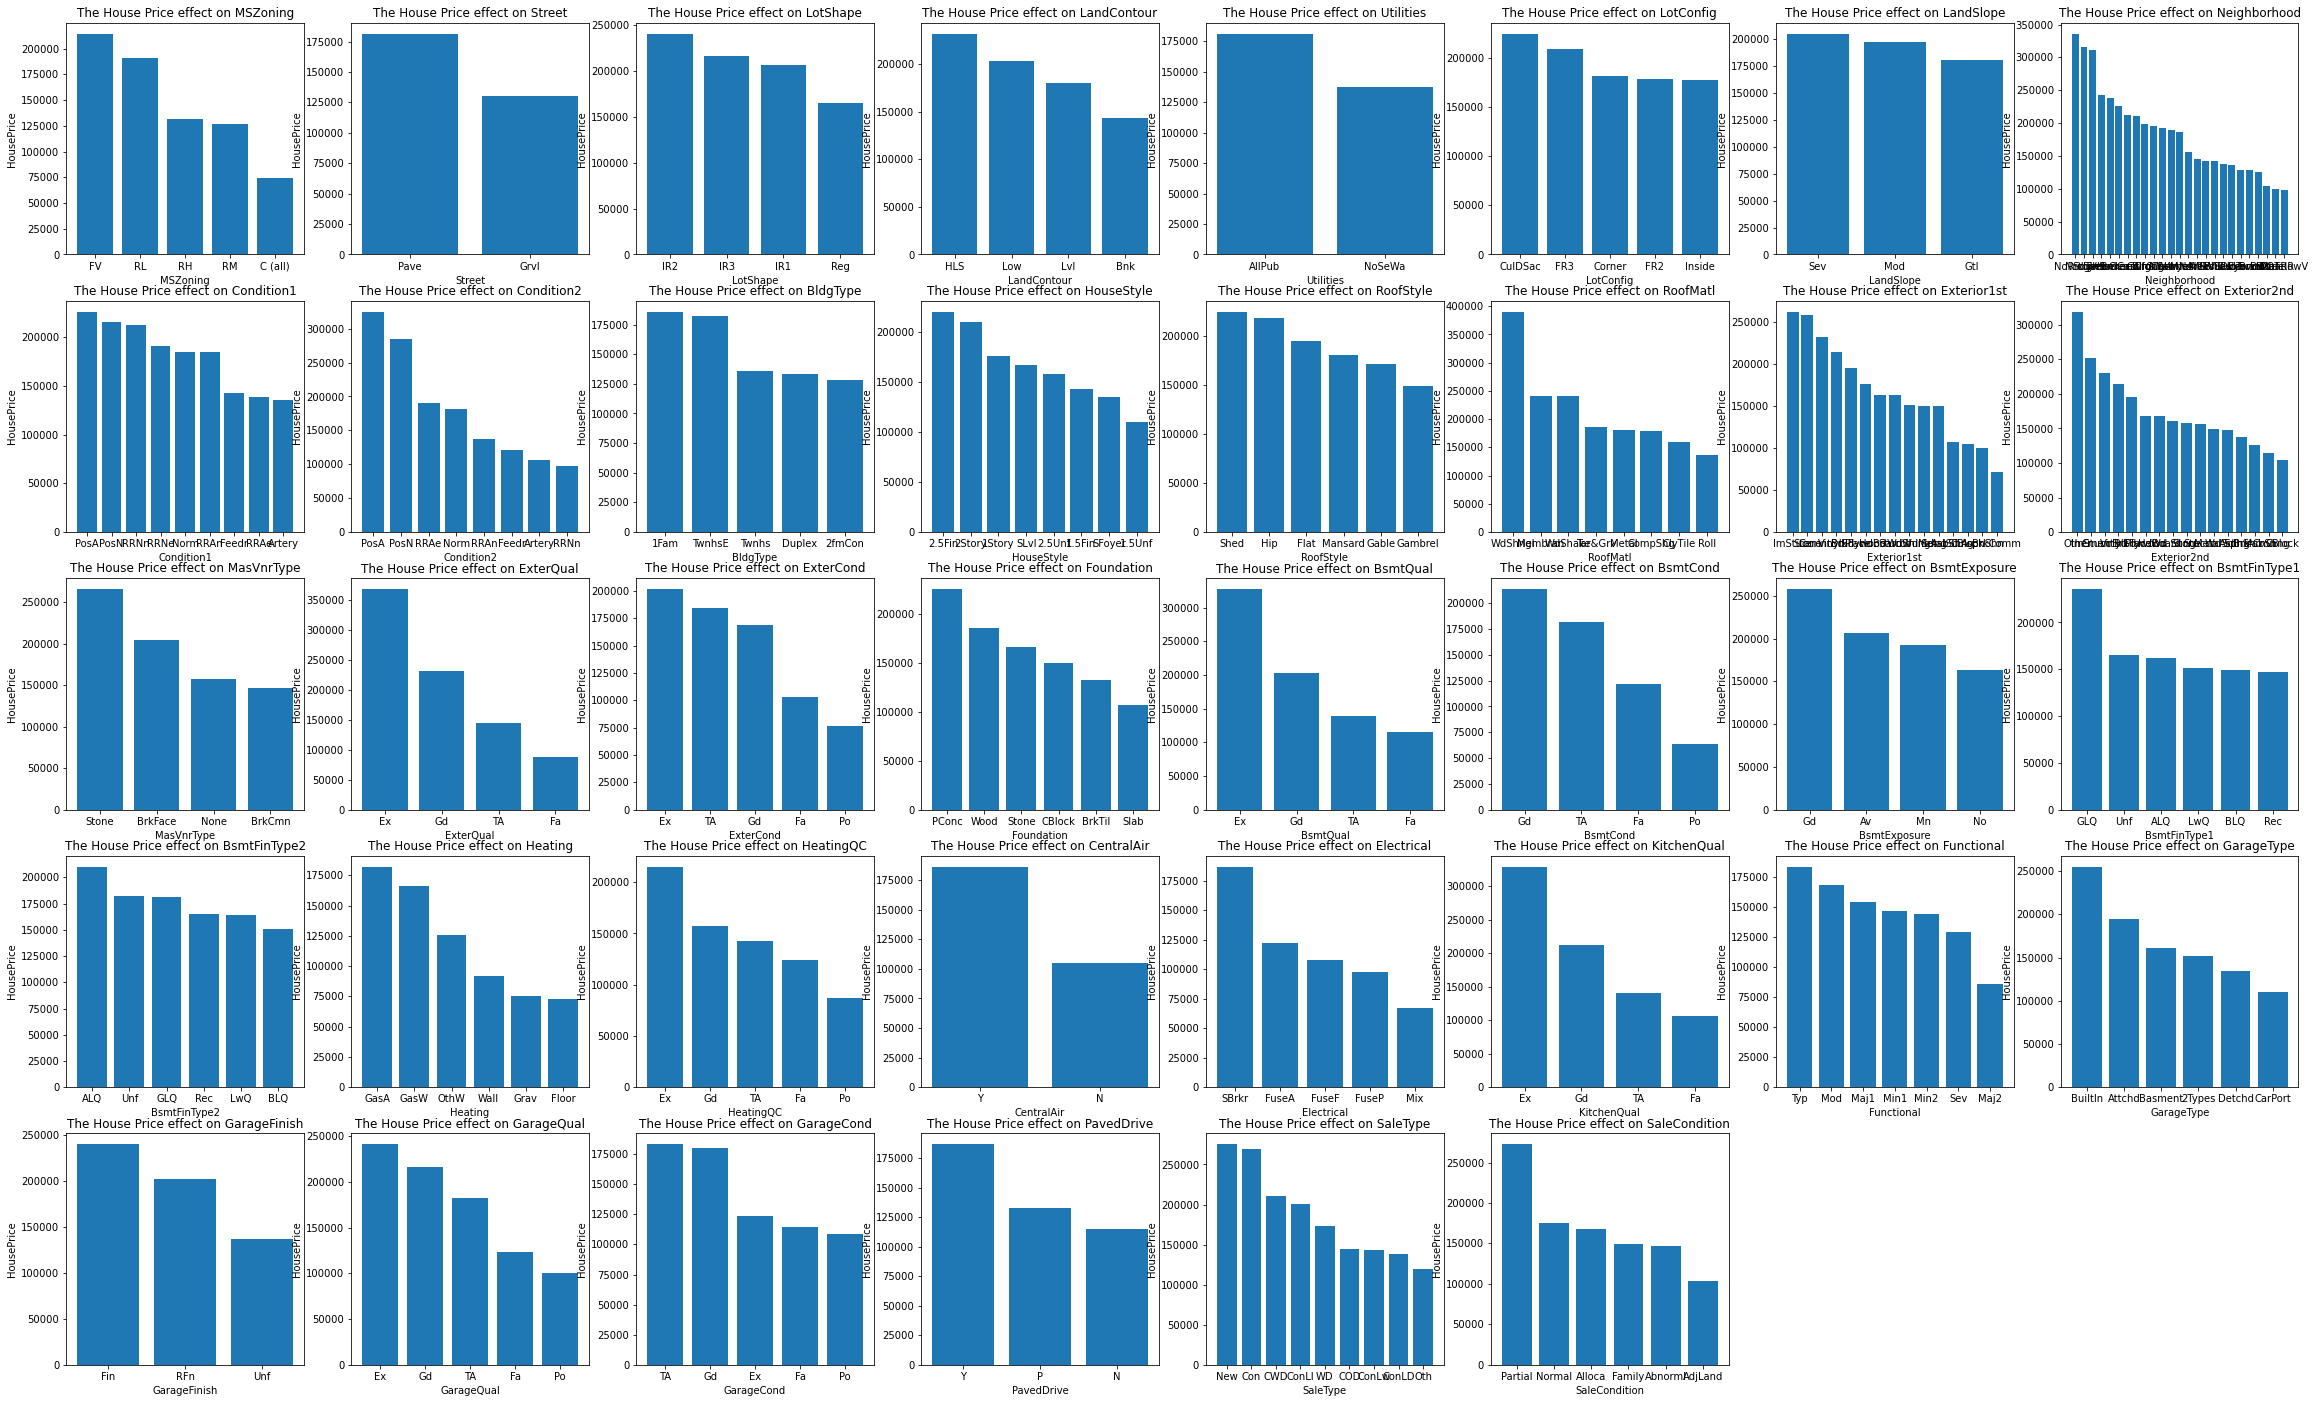

In [53]:
j=0
plt.figure(figsize=(40,40))
for column in objectColumns:
    plt.subplot(8,8,j+1)
    observationval=train_df.groupby(column)["SalePrice"].mean()
    observationval_Df=pd.DataFrame(observationval).sort_values(by="SalePrice",ascending=False)
    observationval_Df.reset_index(inplace=True)
    plt.title(f"The House Price effect on {column}")
    plt.bar(observationval_Df[column],observationval_Df["SalePrice"])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1


Handling Outliers

In [54]:
continuesCols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [56]:
train_df.shape

(1460, 75)

In [57]:
train_df["LotFrontage"].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [55]:
upperlimit=train_df["LotFrontage"].mean()+3*train_df["LotFrontage"].std()
lowerlimit=train_df["LotFrontage"].mean()-3*train_df["LotFrontage"].std()

In [58]:
upperlimit

135.9467298969942

In [59]:
lowerlimit

3.780667363279747

In [62]:
train_df[(train_df["LotFrontage"]<=upperlimit ) & (train_df["LotFrontage"]>=lowerlimit)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [61]:
1460-1444

16

In [64]:
train_df.loc[(train_df["LotFrontage"]>upperlimit),"LotFrontage"]=upperlimit

In [68]:
train_df.loc[(train_df["LotFrontage"]>upperlimit),"LotFrontage"]

Series([], Name: LotFrontage, dtype: float64)

In [67]:
train_df[(train_df["LotFrontage"]<=upperlimit ) & (train_df["LotFrontage"]>=lowerlimit)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [69]:
for column in continuesCols:
    upperlimit=train_df[column].mean()+3*train_df[column].std()
    lowerlimit=train_df[column].mean()-3*train_df[column].std()
    train_df.loc[(train_df[column]>upperlimit),column]=upperlimit
    train_df.loc[(train_df[column]<lowerlimit),column]=lowerlimit

In [70]:
train_df[(train_df[column]<=upperlimit ) & (train_df[column]>=lowerlimit)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.000000,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,205.311555,0,0.0,0,0.000000,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.000000,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,8,2007,WD,Normal,175000.0
1456,20,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,2,2010,WD,Normal,210000.0
1457,70,RL,66.0,9042.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,1531.858114,5,2010,WD,Normal,266500.0
1458,20,RL,68.0,9717.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112.000000,0,0.0,0,0.000000,4,2010,WD,Normal,142125.0


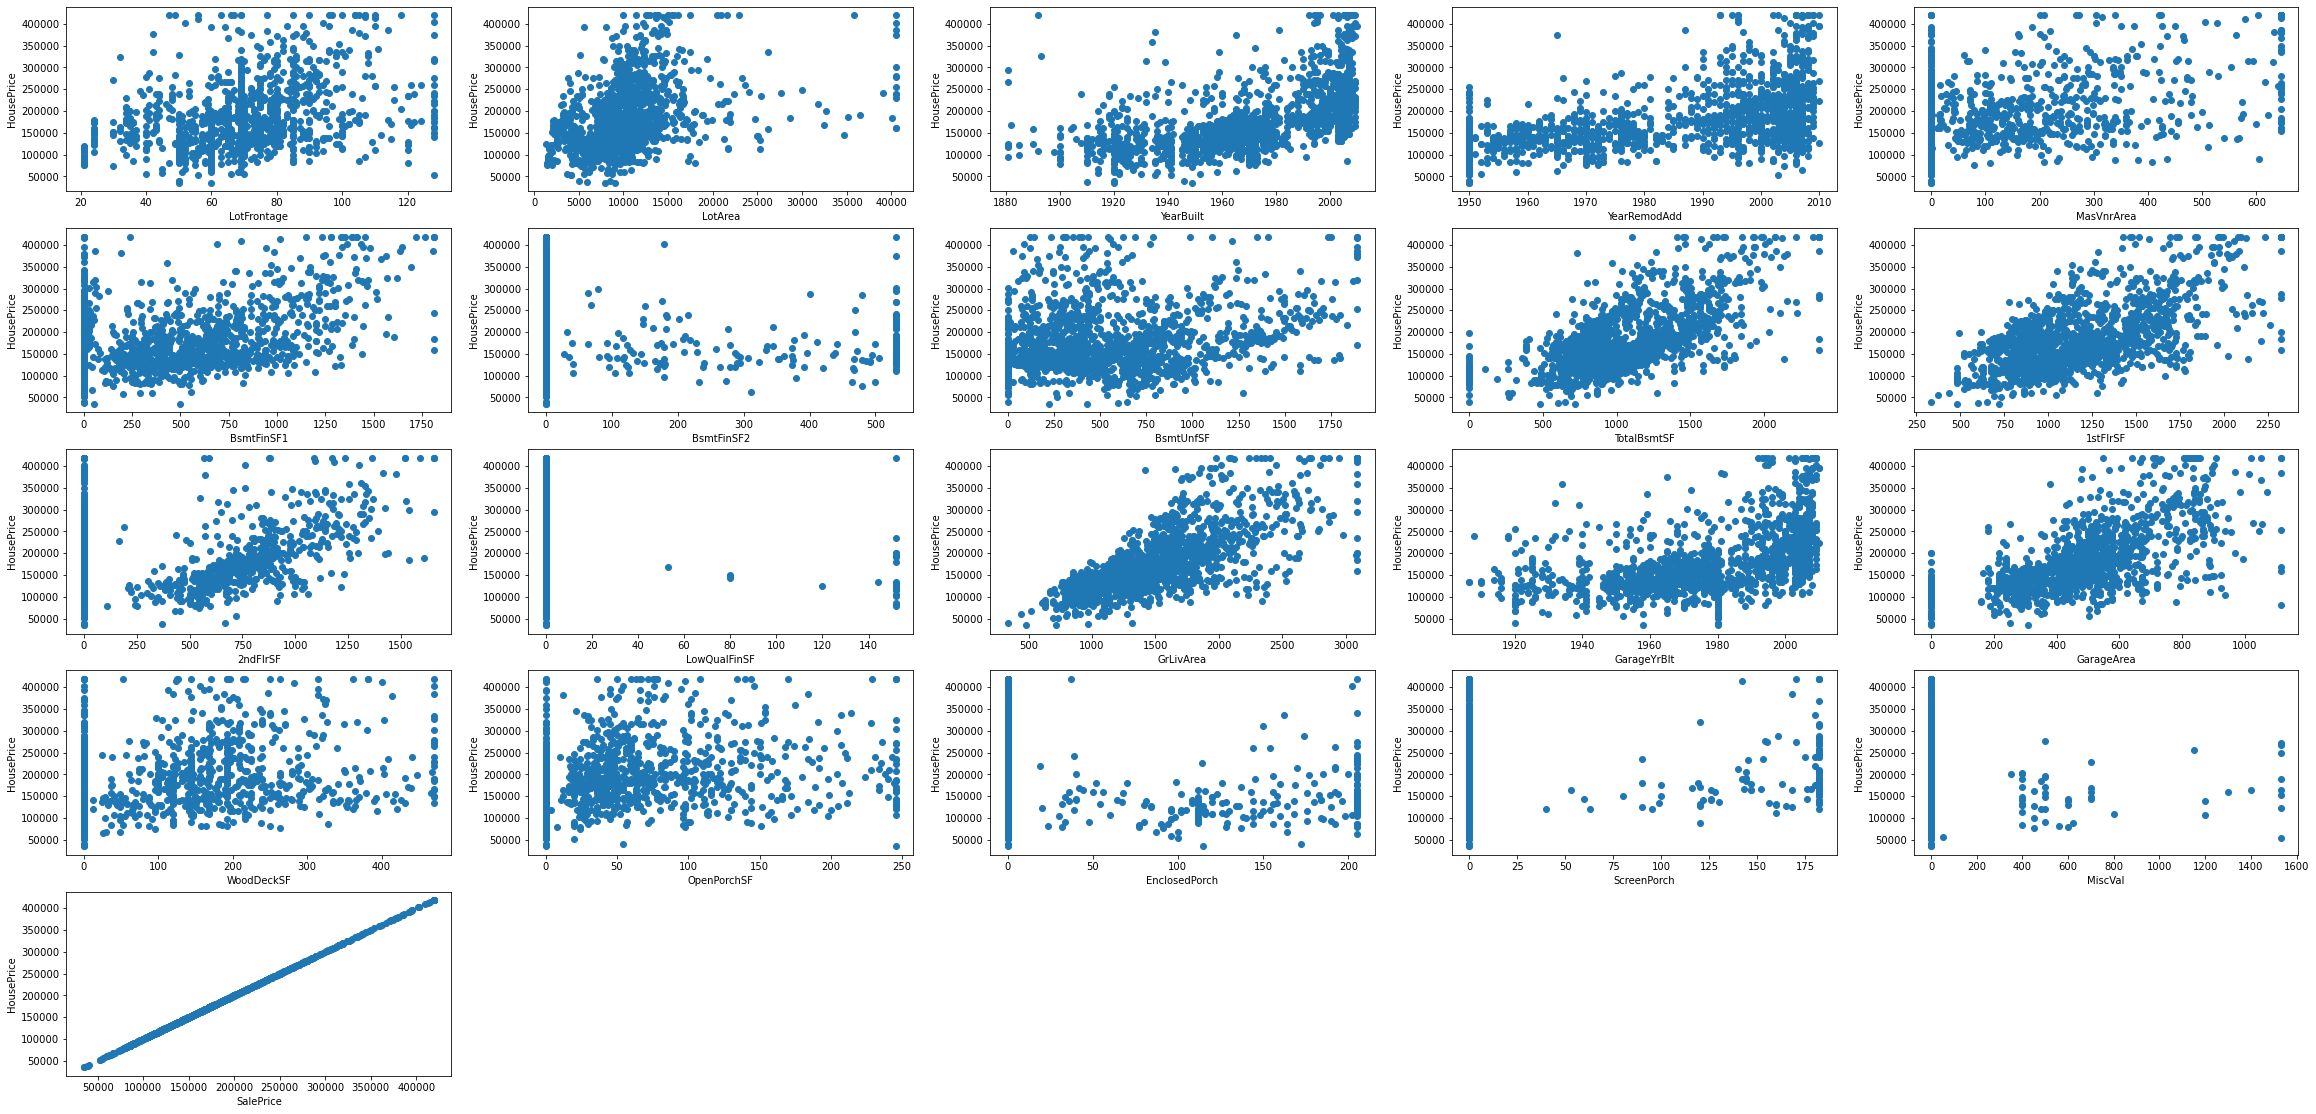

In [71]:
j=0
plt.figure(figsize=(40,40))
for column in continuesCols:
    plt.subplot(10,5,j+1)
    plt.scatter(train_df[column],train_df['SalePrice'])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

In [1]:
trainObjectDf=train_df[objectColumns]

NameError: name 'train_df' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder
MSZoningLE=LabelEncoder()
MSZoningLE.fit_transform(train_df["MSZoning"])

In [ ]:
from collections import defaultdict
defaultEncoder=defaultdict(LabelEncoder)
train_df.apply(lambda x: defaultEncoder[x.name].fit_transform(x))